# Imports

In [ ]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from scipy.stats import shapiro, kstest, normaltest
from scipy import stats

# Load and organize data

In [ ]:
three_a = pd.read_csv('../csv/fig3a_generalimage.csv')
three_b = pd.read_csv('../csv/fig3b_imagetransfer.csv')

three_b.head(n=2)

,Unnamed: 0,Schema,Control
0,0,66.983696,68.478261
1,1,69.021739,65.760870


In [ ]:
df_a = pd.DataFrame({'Accuracy':three_a['Schema']})
df_a['Network type'] = 'Schema'

df_b = pd.DataFrame({'Accuracy':three_a['Control']})
df_b['Network type'] = 'Control'

new_a = pd.concat([df_a, df_b])
new_a.head(n=3)

,Accuracy,Network type
0,90.896739,Schema
1,83.831522,Schema
2,85.326087,Schema


In [ ]:
df_a = pd.DataFrame({'Accuracy':three_b['Schema']})
df_a['Network type'] = 'Schema'

df_b = pd.DataFrame({'Accuracy':three_b['Control']})
df_b['Network type'] = 'Control'

new_b = pd.concat([df_a, df_b])
new_b.head(n=3)

,Accuracy,Network type
0,66.983696,Schema
1,69.021739,Schema
2,72.826087,Schema


In [ ]:
new_a['Learning'] = 'Direct learning'
new_b['Learning'] = 'Transfer learning'

new_combined = pd.concat([new_a, new_b])

In [ ]:
new_combined.head(n=2)

,Accuracy,Network type,Learning
0,90.896739,Schema,Direct learning
1,83.831522,Schema,Direct learning


# Plot the data

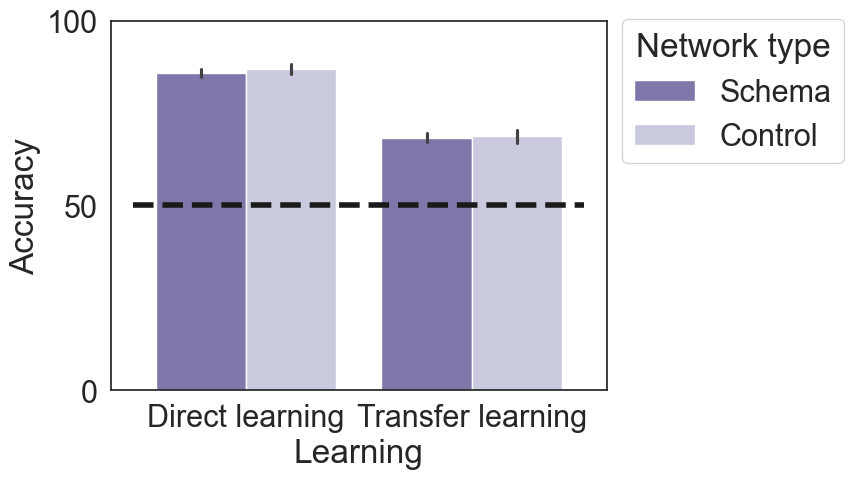

In [ ]:
sb.set(font_scale=2)
sb.set_style("white")

ax = sb.barplot(data=new_combined, x='Learning', y='Accuracy', hue='Network type', palette='Purples_r')
ax.set_ylim(0,100)
ax.set_yticks([0,50,100])
#ax.set_xlabel(' ')

sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.045))

plt.hlines(y=50, xmin=-.5, xmax=1.5, linestyle='--', color='k', linewidth=4)

# T-tests

In [ ]:
import pingouin as pg

In [ ]:
print(stats.ttest_ind(
    new_combined[(new_combined['Learning']=='Direct learning')&(new_combined['Network type']=='Schema')]['Accuracy'],
    new_combined[(new_combined['Learning']=='Direct learning')&(new_combined['Network type']=='Control')]['Accuracy'],

))


pg.ttest(
    new_combined[(new_combined['Learning']=='Direct learning')&(new_combined['Network type']=='Schema')]['Accuracy'],
    new_combined[(new_combined['Learning']=='Direct learning')&(new_combined['Network type']=='Control')]['Accuracy']
    )

In [ ]:
print(stats.ttest_ind(
    new_combined[(new_combined['Learning']=='Transfer learning')&(new_combined['Network type']=='Schema')]['Accuracy'],
    new_combined[(new_combined['Learning']=='Transfer learning')&(new_combined['Network type']=='Control')]['Accuracy'],

))


pg.ttest(
    new_combined[(new_combined['Learning']=='Transfer learning')&(new_combined['Network type']=='Schema')]['Accuracy'],
    new_combined[(new_combined['Learning']=='Transfer learning')&(new_combined['Network type']=='Control')]['Accuracy']
    )